<h2 style="text-align:center; color: orange">⌞Data pre-processing⌝</h2>

<h4 style="text-decoration:underline">1. Generate descriptive statistics.</h4>

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
# Load the dataset
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the columns
df.columns.to_list()


['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [3]:
num_cols = df.select_dtypes(include=['number']).columns.to_list()
str_cols = df.select_dtypes(exclude=['number']).columns.to_list()

# numerical columns
print(num_cols)

# categorical columns
print(str_cols)

['SeniorCitizen', 'tenure', 'MonthlyCharges']
['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']


In [4]:
# --- 1. Numerical Statistics ---
print("\n" + "="*75)
print(f"{' NUMERICAL STATISTICS ':=^75}")
print("="*75)

if num_cols:
    # We transpose (.T) the describe result so variables are rows.
    # This fits better in a vertical terminal window.
    num_stats = df[num_cols].describe().T
    
    # Optional: Add Median explicitly if you prefer it over '50%'
    num_stats['median'] = df[num_cols].median()
    
    # Reorder columns to put median next to mean
    cols_order = ['count', 'mean', 'median', 'std', 'min', '25%', '50%', '75%', 'max']
    # Filter to ensure we only use columns that exist
    cols_order = [c for c in cols_order if c in num_stats.columns]
    
    print(num_stats[cols_order].round(2))
else:
    print("No numerical columns found.")

print("\n" + "="*75)




========================== NUMERICAL STATISTICS ===========================
                 count   mean  median    std    min   25%    50%    75%  \
SeniorCitizen   7043.0   0.16    0.00   0.37   0.00   0.0   0.00   0.00   
tenure          7043.0  32.37   29.00  24.56   0.00   9.0  29.00  55.00   
MonthlyCharges  7043.0  64.76   70.35  30.09  18.25  35.5  70.35  89.85   

                   max  
SeniorCitizen     1.00  
tenure           72.00  
MonthlyCharges  118.75  



In [5]:
# --- 2. Categorical (Mode) Statistics ---
print("\n" + "="*70)
print(f"{' CATEGORICAL ANALYSIS ':=^70}")
print("="*70)

if str_cols:
    # Create a custom DataFrame to hold the summary
    cat_stats = pd.DataFrame(index=str_cols, columns=['Mode', 'Unique_Count', 'Top_Freq', '%_Dominance'])
    
    for col in str_cols:
        # Get the mode (handling cases with multiple modes by taking the first one)
        modes = df[col].mode()
        mode_val = modes.iloc[0] if not modes.empty else "N/A"
        
        # Get basic counts
        unique_count = df[col].nunique()
        total_count = df[col].count()
        
        # Get frequency of the most common value
        try:
            top_freq = df[col].value_counts().iloc[0]
            dominance = (top_freq / total_count) * 100 if total_count > 0 else 0
        except IndexError:
            top_freq = 0
            dominance = 0
            
        cat_stats.loc[col] = [mode_val, unique_count, top_freq, f"{dominance:.1f}%"]
    
    print(cat_stats)
else:
    print("No categorical columns found.")

print("\n" + "="*70)


======================== CATEGORICAL ANALYSIS ========================
                              Mode Unique_Count Top_Freq %_Dominance
customerID              0002-ORFBO         7043        1        0.0%
gender                        Male            2     3555       50.5%
Partner                         No            2     3641       51.7%
Dependents                      No            2     4933       70.0%
PhoneService                   Yes            2     6361       90.3%
MultipleLines                   No            3     3390       48.1%
InternetService        Fiber optic            3     3096       44.0%
OnlineSecurity                  No            3     3498       49.7%
OnlineBackup                    No            3     3088       43.8%
DeviceProtection                No            3     3095       43.9%
TechSupport                     No            3     3473       49.3%
StreamingTV                     No            3     2810       39.9%
StreamingMovies                

<h4 style="text-decoration:underline">1. Visualize churn distribution.</h4>

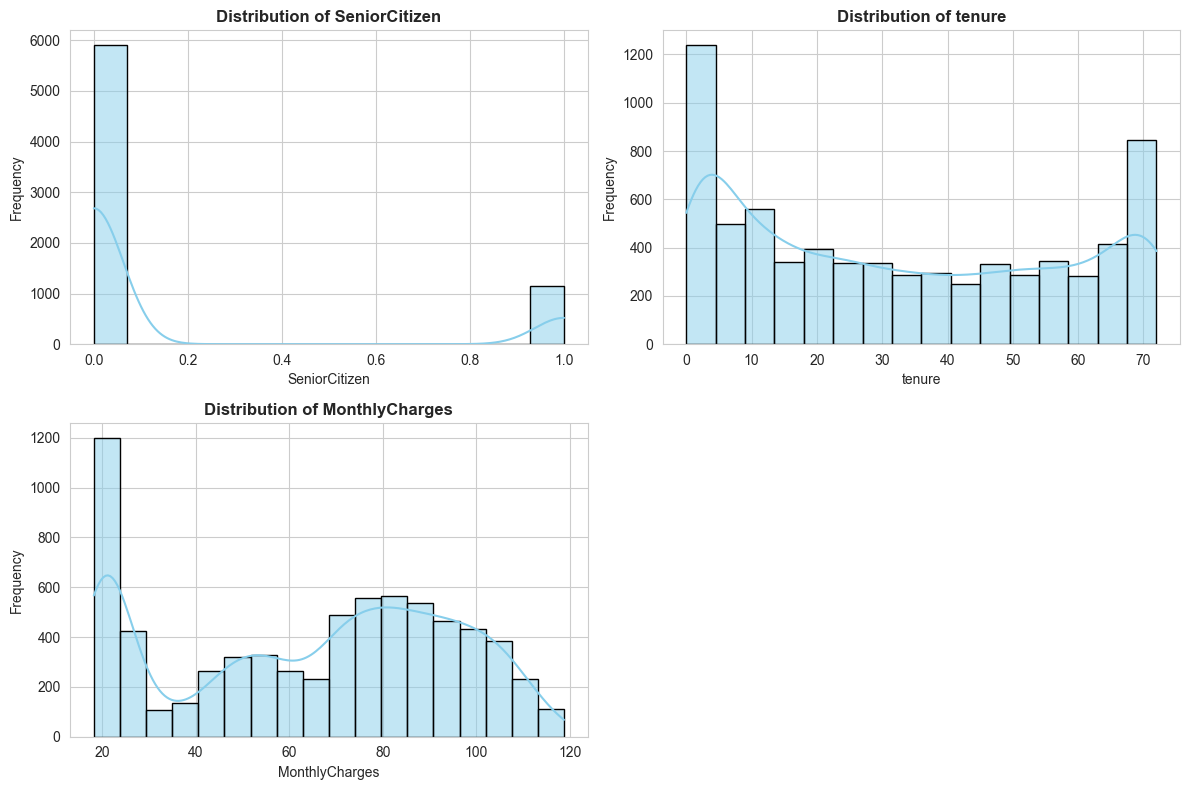

In [6]:
# visualize the numerical columns

# Settings for a clean look
sns.set_style("whitegrid")

# Calculate grid size for subplots
n_cols = 2
n_rows = math.ceil(len(num_cols) / n_cols)

plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(num_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    
    # Plot histogram with KDE
    sns.histplot(df[col], kde=True, ax=ax, color='skyblue', edgecolor='black')
    
    ax.set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [7]:
str_cols[-1]

'Churn'

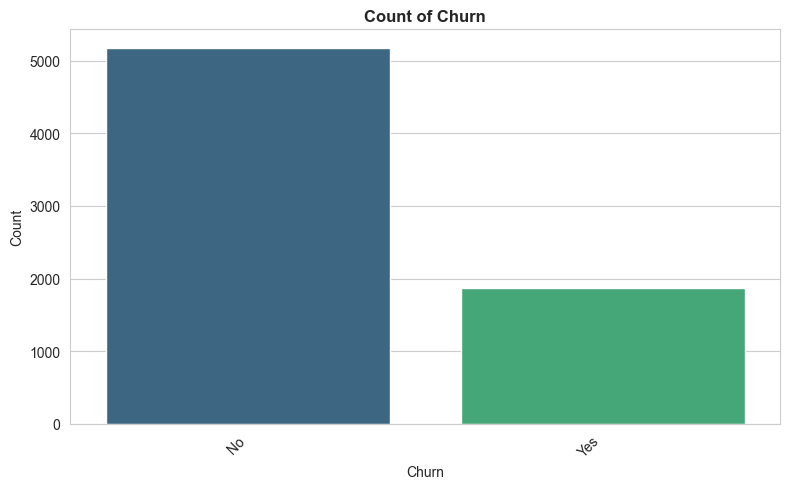

In [8]:
# Calculate grid size for subplots
n_cols = 2
n_rows = 1

plt.figure(figsize=(8, 5))

col = 'Churn'
ax = plt.subplot(1, 1, 1)

order = df[col].value_counts().index

sns.countplot(
    data=df,
    x=col,
    hue=col,
    legend=False,
    order=order,
    ax=ax,
    palette='viridis'
)

ax.set_title(f'Count of {col}', fontsize=12, fontweight='bold')
ax.set_xlabel(col)
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()
